# NYC AQI Time Series Work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the Data

In [2]:
NYC = pd.read_pickle('../datasets/air-quality-reports/aggregates/NYC/NYC.pkl')

In [3]:
NYC.head(10)

,AQI
Date,
2015-01-01,51.0
2015-01-02,56.8
2015-01-03,47.8
2015-01-04,42.2
2015-01-05,40.2
2015-01-06,47.4
2015-01-07,48.4
2015-01-08,41.2
2015-01-09,46.0


## Define train and test

In [4]:
train = NYC.loc[:'2019']

In [5]:
test = NYC.loc['2020']

## Create Holt-Winters model predicting AQI for 2020

In [6]:
from statsmodels.tsa.api import ExponentialSmoothing

In [7]:
predictions = test.copy(deep=True)

In [8]:
hw = ExponentialSmoothing(
    train['AQI'],
    seasonal_periods=365,
    trend='mul',
    seasonal='mul'
).fit()

/Users/juliana/miniforge3/envs/tensorflow/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/juliana/miniforge3/envs/tensorflow/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/juliana/miniforge3/envs/tensorflow/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [9]:
hw.summary()

Dep. Variable:,AQI,No. Observations:,1826
Model:,ExponentialSmoothing,SSE,467125.473
Optimized:,True,AIC,10862.202
Trend:,Multiplicative,BIC,12895.349
Seasonal:,Multiplicative,AICC,11052.040
Seasonal Periods:,365,Date:,"Fri, 21 May 2021"
Box-Cox:,False,Time:,12:02:51
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


In [10]:
predictions['hw'] = hw.forecast(len(test))

In [11]:
hw.predict(len(test))

2015-10-03    16.957921
2015-10-04    24.753646
2015-10-05    23.388313
2015-10-06    32.547409
2015-10-07    27.089260
                ...    
2019-12-27    38.211073
2019-12-28    33.326159
2019-12-29    33.954906
2019-12-30    40.699360
2019-12-31    42.311202
Freq: D, Length: 1551, dtype: float64

In [12]:
predictions['hw']

Date
2020-01-01    44.367529
2020-01-02    45.664382
2020-01-03    42.154516
2020-01-04    45.650944
2020-01-05    42.383633
                ...    
2020-09-27    28.844393
2020-09-28    26.736267
2020-09-29    23.160332
2020-09-30    29.819817
2020-10-01    33.416557
Name: hw, Length: 275, dtype: float64

### Visualize the predictions

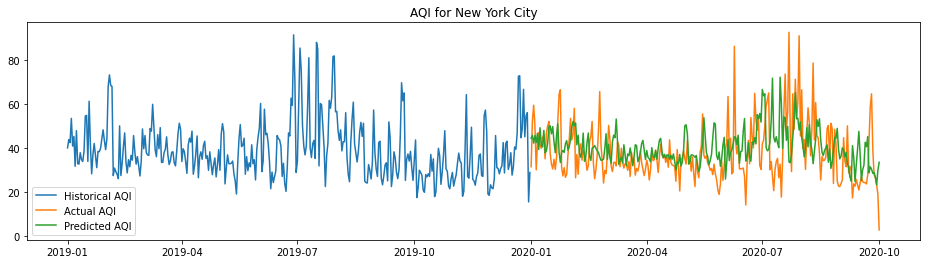

In [34]:
plt.figure(figsize = (16, 4))
plt.plot(train['AQI'].loc['2019'], label = 'Historical AQI')
plt.plot(predictions['AQI'], label = 'Actual AQI')
plt.plot(predictions['hw'], label = 'Predicted AQI')
plt.title('AQI for New York City')
plt.legend();

## Gonna try weekly now

### Resample the data to be weekly

In [14]:
train_wk = train.resample('W').mean()

In [15]:
test_wk = test.resample('W').mean()

In [16]:
train_wk.head()

,AQI
Date,
2015-01-04,49.450000
2015-01-11,47.514286
2015-01-18,56.000000
2015-01-25,49.800000
2015-02-01,44.342857


In [17]:
hw2 = ExponentialSmoothing(
    train_wk['AQI'],
    seasonal_periods=52,
    trend='add',
    seasonal='add'
).fit()

/Users/juliana/miniforge3/envs/tensorflow/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [18]:
hw2.summary()

Dep. Variable:,AQI,No. Observations:,262
Model:,ExponentialSmoothing,SSE,11838.485
Optimized:,True,AIC,1110.421
Trend:,Additive,BIC,1310.248
Seasonal:,Additive,AICC,1144.135
Seasonal Periods:,52,Date:,"Wed, 19 May 2021"
Box-Cox:,False,Time:,10:21:59
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4985e-08,alpha,True
smoothing_trend,3.0901e-21,beta,True


In [19]:
weekly_preds = test_wk.copy(deep=True)

In [36]:
weekly_preds['hw'] = hw2.forecast(len(test_wk))

### Visualize the weekly predictions

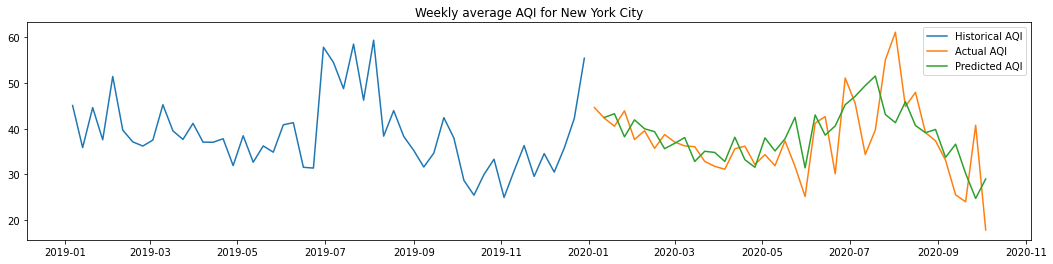

In [37]:
plt.figure(figsize = (18, 4))
plt.plot(train_wk['AQI'].loc['2019'], label = 'Historical AQI')
plt.plot(weekly_preds['AQI'], label = 'Actual AQI')
plt.plot(weekly_preds['hw'], label = 'Predicted AQI')
plt.title('Weekly average AQI for New York City')
plt.legend();

In [38]:
weekly_preds

,AQI,hw
Date,,
2020-01-05,44.640000,NaN
2020-01-12,42.285714,42.471342
2020-01-19,40.542857,43.283105
2020-01-26,43.914286,38.214039
2020-02-02,37.628571,41.945886
2020-02-09,39.571429,39.985842
2020-02-16,35.685714,39.351423
2020-02-23,38.714286,35.620115
2020-03-01,37.085714,36.785852


In [35]:
predictions

,AQI,hw
Date,,
2020-01-01,31.400000,44.367529
2020-01-02,52.600000,45.664382
2020-01-03,59.400000,42.154516
2020-01-04,49.800000,45.650944
2020-01-05,30.000000,42.383633
...,...,...
2020-09-27,27.800000,28.844393
2020-09-28,26.400000,26.736267
2020-09-29,23.400000,23.160332


## Exporting Predictions

In [39]:
predictions.to_csv('../predictions/nyc_daily_predictions.csv')

In [40]:
weekly_preds.to_csv('../predictions/nyc_weekly_predictions.csv')

In [47]:
weekly_train = pd.DataFrame(data=train_wk, columns=['AQI'])

In [48]:
weekly_train

,AQI
Date,
2015-01-04,49.450000
2015-01-11,47.514286
2015-01-18,56.000000
2015-01-25,49.800000
2015-02-01,44.342857
...,...
2019-12-08,30.485714
2019-12-15,35.771429
2019-12-22,42.257143


In [49]:
weekly_test = pd.DataFrame(data=test_wk, columns=['AQI'])

In [51]:
weekly = pd.concat((train_wk, test_wk))

In [52]:
weekly

,AQI
Date,
2015-01-04,49.450000
2015-01-11,47.514286
2015-01-18,56.000000
2015-01-25,49.800000
2015-02-01,44.342857
...,...
2020-09-06,33.085714
2020-09-13,25.514286
2020-09-20,23.971429


In [53]:
weekly.to_csv('../datasets/air-quality-reports/aggregates/NYC/nyc_weekly_aqi.csv')